# Adorsys  


## Setup and import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [2]:
data = pd.read_table('data/Exercise1.csv',sep=';')
label_name = ['finance', 'income', 'leisure', 'living', 'private', 'standardOfLiving']

In [3]:
data.head()

,Unnamed: 0,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,Waehrung,label
0,0,89990201.0,28.07.2016,28.07.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,EUR,income
1,1,89990201.0,27.07.2016,27.07.2016,Miete,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,DE31251900019123456780,VOHADE2HXXX,-670.00,EUR,living
2,2,89990201.0,21.07.2016,21.07.2016,Bargeld,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,9999900780,25190001,-70.00,EUR,private
3,3,89990201.0,20.07.2016,20.07.2016,Lebensmittel / Getraenke,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,9736000780,25190001,-73.21,EUR,standardOfLiving
4,4,89990201.0,18.07.2016,18.07.2016,Spontanausgabe,Amazon,neue Playstation,9988776655,25125100,-363,EUR,leisure


In [4]:
# Define the documents
documents = data[['Buchungstext', 'Verwendungszweck', 'Beguenstigter/Zahlungspflichtiger']]. \
    apply(lambda x: ' '.join(x), axis=1)
# Import the count vectorizer and initialize it
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

count_vector.fit(documents)
names = count_vector.get_feature_names()
doc_array = count_vector.transform(documents).toarray()
frequency_matrix = pd.DataFrame(data=doc_array, columns=names)


## Split data in testing and training set

In [5]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(documents, data["label"], train_size=0.7, test_size=0.3, random_state=1)


## Vectorize the data 

In [6]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
# Transform testing data and return the matrix. Note: not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

print(count_vector.get_feature_names())



['00', '000', '0000000000', '001', '0084632', '00eur0', '01', '016', '0164378887929309', '01e', '01t06', '01t11', '01t17', '02', '02t13', '02t14', '02t22', '03', '03t12', '03t16', '04', '04t17', '05', '0580631', '05t09', '05t23', '06', '07', '07folgenr', '08', '09', '09t07', '09t17', '10', '100', '10103084736793zalando', '10316011', '10355311', '10355735', '10355969', '10355999', '10t17', '11', '1137', '116', '12', '12272140', '122721405', '13', '14', '140', '14t12', '15', '150244534', '150251073', '150257651', '15t17', '16', '161080109883418', '1612', '162146', '1637782719640441', '16t17', '17', '18', '18t21', '19', '19t17', '1u1', '20', '2001136', '201', '2016', '2020', '2099', '20t15', '20t17', '21', '22', '2202002154', '220200215414', '23', '23t13', '2410573888643087', '2411354884929964', '24t12', '25', '26', '27', '279', '27folgenr', '27t10', '27t11', '2831', '29', '30', '303', '30t14', '31', '317', '32', '320000042615', '33', '330000099057', '34439927', '34uhr', '35', '36', '37',

## Get to know the data

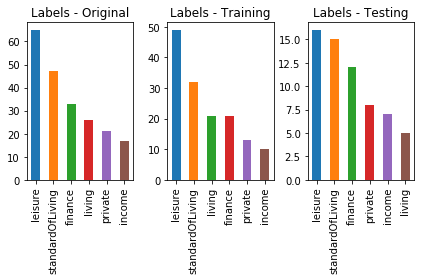

In [7]:
plt.subplot(1, 3, 1)
data['label'].value_counts().plot(kind='bar')
plt.title("Labels - Original")

plt.subplot(1, 3, 2)
y_train.value_counts().plot(kind='bar')
plt.title("Labels - Training")

plt.subplot(1, 3, 3)
y_test.value_counts().plot(kind='bar')
plt.title("Labels - Testing")
plt.tight_layout()
plt.show()

## Apply Naive Bayes

In [8]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

prediction = naive_bayes.predict(testing_data)

## Evaluation

In [9]:

from sklearn.metrics import accuracy_score
print('Accuracy score: ', format(accuracy_score(y_test, prediction)))

Accuracy score:  0.9365079365079365


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, target_names = label_name))

                  precision    recall  f1-score   support

         finance       1.00      0.92      0.96        12
          income       1.00      1.00      1.00         7
         leisure       0.84      1.00      0.91        16
          living       0.80      0.80      0.80         5
         private       1.00      0.88      0.93         8
standardOfLiving       1.00      0.93      0.97        15

     avg / total       0.94      0.94      0.94        63



Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[11  0  1  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  1  4  0  0]
 [ 0  0  0  1  7  0]
 [ 0  0  1  0  0 14]]
Normalized confusion matrix
[[0.92 0.   0.08 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.2  0.8  0.   0.  ]
 [0.   0.   0.   0.12 0.88 0.  ]
 [0.   0.   0.07 0.   0.   0.93]]


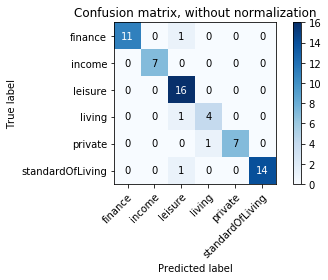

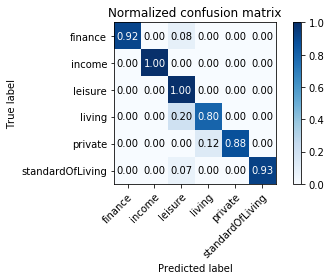

In [11]:
print(__doc__)


class_names = data["label"]


def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
conf_matr = plot_confusion_matrix(y_test, prediction, classes=label_name,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test,prediction, classes=label_name, normalize=True,
                      title='Normalized confusion matrix')

plt.show()